Dataset downloaded from
https://www.kaggle.com/niharika41298/withwithout-mask

In [4]:
import os
import shutil
import zipfile
import numpy as np
from google.colab import files
from keras.preprocessing import image

In [ ]:



uploaded = files.upload()
shutil.move("/content/archive (5).zip", "/tmp/archive (3).zip")
local_zip = '/tmp/archive (3).zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()


Saving archive (5).zip to archive (5).zip


In [ ]:
#change directories based on tmp

# Directory with our training horse pictures
train_horse_dir = os.path.join('/tmp/horse-or-human/maskdata/maskdata/train/with_mask')

# Directory with our training human pictures
train_human_dir = os.path.join('/tmp/horse-or-human/maskdata/maskdata/train/without_mask')

# Directory with our training horse pictures
validation_horse_dir = os.path.join('/tmp/horse-or-human/maskdata/maskdata/test/with_mask')

# Directory with our training human pictures
validation_human_dir = os.path.join('/tmp/horse-or-human/maskdata/maskdata/test/without_mask')

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0


train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['236-with-mask.jpg', '472-with-mask.jpg', '392-with-mask.jpg', '157-with-mask.jpg', '368-with-mask.jpg', '242-with-mask.jpg', '201-with-mask.jpg', '121-with-mask.jpg', '479-with-mask.jpg', '239-with-mask.jpg']
['322.jpg', '16.jpg', '76.jpg', '188.jpg', '54.jpg', '241.jpg', '73.jpg', '260.jpg', '4.jpg', '284.jpg']


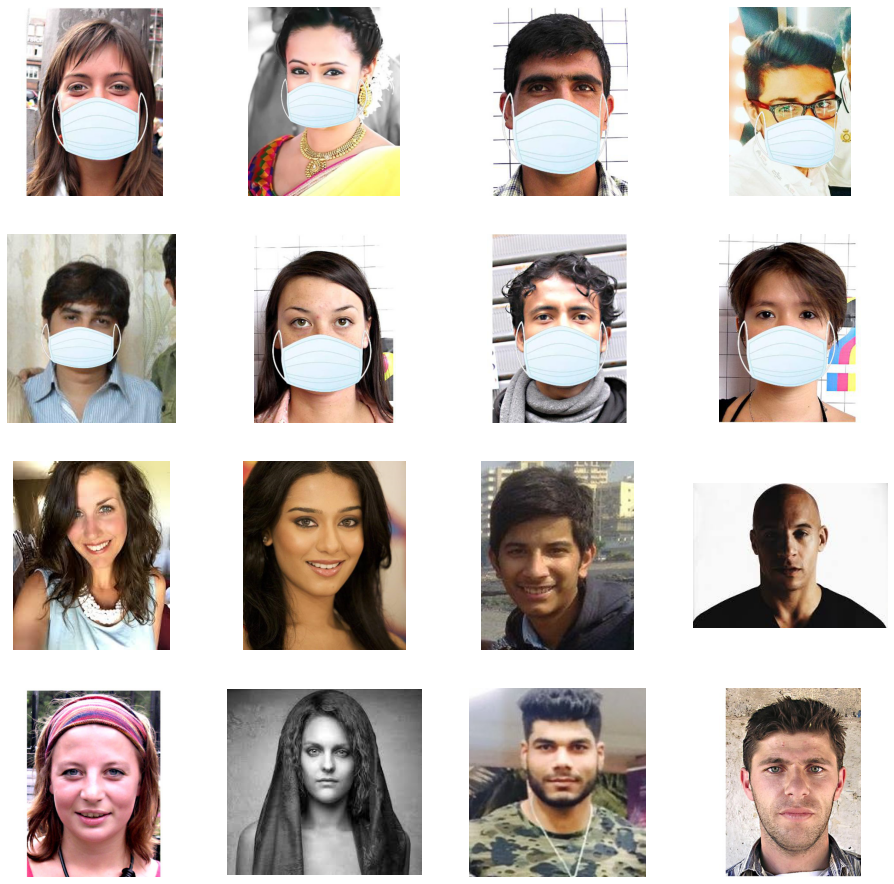

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname)
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname)
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [5]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
dropout (Dropout)            (None, 147, 147, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 71, 71, 64)        0

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
#change folder path for train and test

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/maskdata/maskdata/train/',  #source directory for training
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/tmp/horse-or-human/maskdata/maskdata/test/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 616 images belonging to 2 classes.
Found 198 images belonging to 2 classes.


In [ ]:
%%time
history = model.fit(
      train_generator,
      steps_per_epoch=2,
      epochs=100,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=2)

Epoch 1/100
2/2 [==============================] - 7s 4s/step - loss: 0.2027 - accuracy: 0.9219 - val_loss: 0.3353 - val_accuracy: 0.9844
Epoch 2/100
2/2 [==============================] - 6s 3s/step - loss: 0.1647 - accuracy: 0.9375 - val_loss: 0.2997 - val_accuracy: 0.9844
Epoch 3/100
2/2 [==============================] - 6s 3s/step - loss: 0.1509 - accuracy: 0.9267 - val_loss: 0.2944 - val_accuracy: 0.9844
Epoch 4/100
2/2 [==============================] - 6s 3s/step - loss: 0.1371 - accuracy: 0.9609 - val_loss: 0.2989 - val_accuracy: 0.9531
Epoch 5/100
2/2 [==============================] - 6s 3s/step - loss: 0.1802 - accuracy: 0.9414 - val_loss: 0.2815 - val_accuracy: 1.0000
Epoch 6/100
2/2 [==============================] - 6s 3s/step - loss: 0.1793 - accuracy: 0.9310 - val_loss: 0.3016 - val_accuracy: 0.9531
Epoch 7/100
2/2 [==============================] - 6s 3s/step - loss: 0.1927 - accuracy: 0.9297 - val_loss: 0.3379 - val_accuracy: 0.9844
Epoch 8/100
2/2 [=================

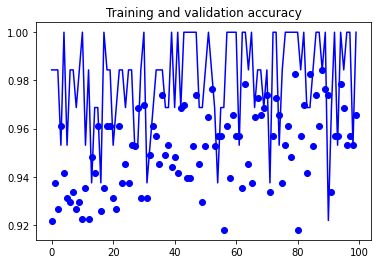

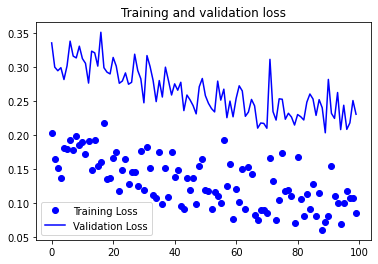

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
!pip install pyyaml h5py  # Required to save models in HDF5 format https://en.wikipedia.org/wiki/Hierarchical_Data_Format
model.save('mask_nomask_model.h5')


In [6]:
import tensorflow as tf

# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('/content/mask_nomask_model.h5')
model = new_model

In [19]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
from IPython.display import Audio



uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = tf.keras.utils.load_img(path, target_size=(300, 300))
  x = tf.keras.utils.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a without_mask")
  else:
    print(fn + " is a with MASK")



Saving 325.jpg to 325.jpg
1/1 [==============================] - 0s 21ms/step
[1.]
325.jpg is a without_mask


In [20]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


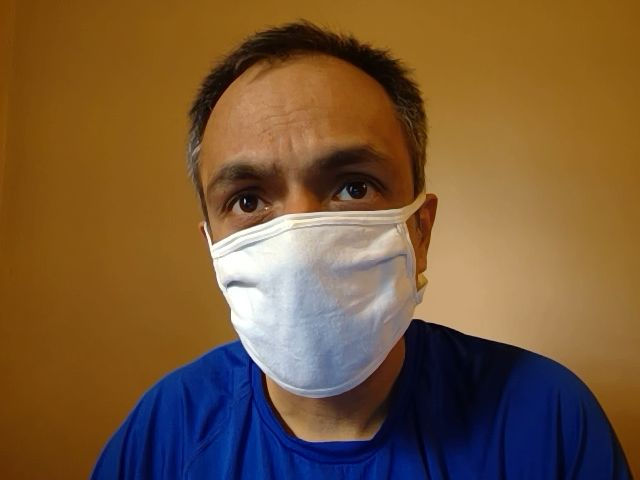

1/1 [==============================] - 0s 19ms/step
[0.]
photo.jpg is a with MASK


In [23]:
from IPython.display import Image
try:
  #while (1):
    filename = take_photo()
    print('Saved to {}'.format(filename))
    #take_photo()
  # Show the image which was just taken.
    display(Image(filename))
    img = tf.keras.utils.load_img(filename, target_size=(300, 300))
    x = tf.keras.utils.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print(classes[0])
    if classes[0]>0.5:
      print(filename + " is a without_mask")
    else:
      print(filename + " is a with MASK")
      #playsound('audio.mp3')

except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

In [ ]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }

    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }

    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);

      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);

      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { }});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);

      const instruction = document.createElement('div');
      instruction.innerHTML =
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };

      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);

      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();

      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }

      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }

      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;

      return {'create': preShow - preCreate,
              'show': preCapture - preShow,
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)

def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [ ]:
# function to convert the JavaScript object into  image
def js_to_image(js_reply):
  binary = b64decode(js_reply.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename


In [ ]:
# start streaming video from webcam
#from IPython.display import clear_output


video_stream()
# label for video
#predString = "True"
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image -
    imgCaptured = js_to_image(js_reply["img"])
    img = image.load_img(imgCaptured, target_size=(300, 300))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    #clear_output()
    #print(classes[0])
    if classes[0]>0.5:
      print(" is a without_mask")
      #predString = " is a without mask"
      #printout(predString)

    else:
      print(" is a with MASK")
      #predString = " is a with Mask"
      #printout(predString)



<IPython.core.display.Javascript object>

 is a with MASK
 is a with MASK
 is a with MASK
 is a with MASK
 is a with MASK
 is a with MASK
 is a with MASK
 is a with MASK
 is a without_mask
 is a without_mask
 is a without_mask
 is a without_mask
 is a without_mask
 is a without_mask
 is a without_mask
 is a with MASK
 is a without_mask
